<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw2/hw2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final architecture

I have run the final architecture using Simpleholdout and k-fold validation. The accuracy of Simple holdout validation after 200 epochs is 83.34% and for k-fold validation, it is 84.08%. When I have trained the model with the original training dataset(No validation dataset), then the maximum accuracy that I could achieve is 85.31%, which is slightly higher than using validation dataset.

### Imports

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Loading data

In [2]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 40s 0us/step


In [3]:
train_images_original.shape, train_labels_original.shape,test_images_original.shape, test_labels_original.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Preprocessing data

#### Shuffling the training dataset

Images before shuffling


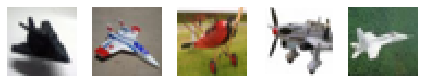

Images after shuffling


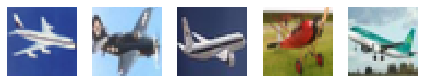

In [4]:
# Shuffling
index_shuffled = np.random.permutation(50000)
train_images_shuffled = train_images_original[index_shuffled]
train_labels_shuffled = train_labels_original[index_shuffled]

#Displaying few images before shuffling
print("Images before shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

# Displaying images after shuffling for same indices
print("Images after shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_shuffled)):
  label = train_labels_shuffled[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_shuffled[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

#### Flattening and reshaping of images

In [0]:
train_labels_shuffled = keras.utils.to_categorical(train_labels_shuffled,10) # Since we have 10 classes
test_labels = keras.utils.to_categorical(test_labels_original,10)

train_images_shuffled = train_images_shuffled.astype('float32')/255
test_images = test_images_original.astype('float32')/255


### Building the model

In [0]:
def model_run(train_images, train_labels,val_images,val_labels, epoch):
  batch_size = 128
  num_epochs = epoch

  model = Sequential()

  # Layer 1
  model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=train_images.shape[1:]))

  #Layer2
  model.add(Conv2D(64, (3,3),activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  #Layer 3
  model.add(Conv2D(128, (3, 3),activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  #Dense layers
  model.add(Flatten())
  model.add(Dense(512, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.35))
  model.add(Dense(10, activation ='softmax'))

  #model.summary()
  model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 0.0005),
              metrics=['accuracy'])

  datagen = ImageDataGenerator(  
        zca_epsilon=1e-06,  
        rotation_range=0,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip = False
        )

  datagen.fit(train_images)

  metrics = model.fit_generator(datagen.flow(train_images, train_labels,
                        batch_size=batch_size),
                        epochs=num_epochs,
                        steps_per_epoch =100,
                        validation_data=(val_images, val_labels), validation_steps = 50,
                        workers=4)
  
  # Displaying the training and test accuracy
  train_acc = metrics.history['acc']
  val_acc = metrics.history['val_acc']


  epochs = range(1, len(train_acc) + 1)


  plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
  plt.title('Training and Validation accuracy')
  plt.legend()
  plt.show()
  return val_acc[-1]


### Training for the original training dataset

In [7]:
batch_size = 128
num_epochs = 200

train_labels_original = keras.utils.to_categorical(train_labels_original,10) # Since we have 10 classes
train_images_original = train_images_original.astype('float32')/255


model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=train_images_original.shape[1:]))

#Layer2
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Conv2D(128, (3, 3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Dense layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(10, activation ='softmax'))

#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 0.0005),
              metrics=['accuracy'])

datagen = ImageDataGenerator(  
        zca_epsilon=1e-06,  
        rotation_range=0,  
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True,
        vertical_flip = False
        )

datagen.fit(train_images_original)

metrics = model.fit_generator(datagen.flow(train_images_original, train_labels_original,
                        batch_size=batch_size),
                        epochs=num_epochs,
                        steps_per_epoch =100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
100/100 [==============================] - 11s 110ms/step - loss: 2.2098 - acc: 0.3336
Epoch 2/200
100/100 [==============================] - 8s 75ms/step - loss: 1.7744 - acc: 0.4132
Epoch 3/200
100/100 [==============================] - 8s 76ms/step - loss: 1.5906 - acc: 0.4654
Epoch 4/200
100/100 [==============================] - 8s 75ms/step - loss: 1.4319 - acc: 0.5132
Epoch 5/200
100/100 [==============================] - 7s 75ms/step - loss: 1.3251 - acc: 0.5437
Epoch 6/200
100/100 [==============================] - 7s 74ms/step - loss: 1.2506 - acc: 0.5687
Epoch 7/200
100/100 [==============================] - 7s 74ms/step - loss: 1.2080 - acc: 0.5770
Epoch 8/200
100/100 [==============================] - 7s 75ms/step - loss: 1.1124 -

### Simple Holdout validation

I have executed this in hw2_arch5.ipynb. I could get a maximum validation accuracy of 85.14%. Validation accuracy for 200th epoch is 83.34%

### Running the model for k-fold

#### Using function

I have run this only for 50 epochs as I will getting 'Buffered data was truncated after reaching the output size limit' error due to the limit of cell output limit in colab. So, I have executed each fold manually in different cell as suggested by the professor.

Fold 1
Epoch 1/50
100/100 [==============================] - 11s 109ms/step - loss: 2.1303 - acc: 0.3513 - val_loss: 2.3344 - val_acc: 0.3845
Epoch 2/50
100/100 [==============================] - 9s 89ms/step - loss: 1.6711 - acc: 0.4466 - val_loss: 1.7092 - val_acc: 0.4571
Epoch 3/50
100/100 [==============================] - 9s 91ms/step - loss: 1.4927 - acc: 0.4923 - val_loss: 1.3169 - val_acc: 0.5553
Epoch 4/50
100/100 [==============================] - 9s 89ms/step - loss: 1.3629 - acc: 0.5386 - val_loss: 1.5630 - val_acc: 0.4957
Epoch 5/50
100/100 [==============================] - 9s 90ms/step - loss: 1.2902 - acc: 0.5616 - val_loss: 1.4076 - val_acc: 0.5307
Epoch 6/50
100/100 [==============================] - 9s 89ms/step - loss: 1.2012 - acc: 0.5873 - val_loss: 1.1855 - val_acc: 0.5984
Epoch 7/50
100/100 [==============================] - 9s 89ms/step - loss: 1.1462 - acc: 0.6030 - val_loss: 1.1807 - val_acc: 0.5939
Epoch 8/50
100/100 [==============================] - 9s 88m

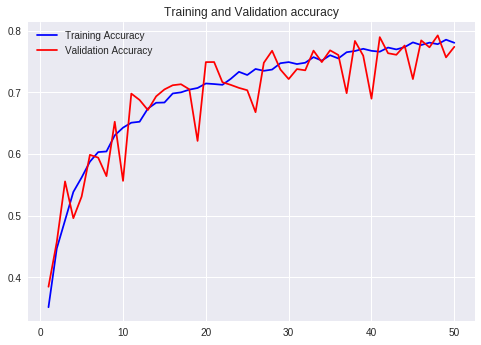

0.7736
Fold 2
Epoch 1/50
100/100 [==============================] - 11s 109ms/step - loss: 2.1779 - acc: 0.3339 - val_loss: 1.7569 - val_acc: 0.4264
Epoch 2/50
100/100 [==============================] - 9s 90ms/step - loss: 1.7373 - acc: 0.4259 - val_loss: 2.2130 - val_acc: 0.3396
Epoch 3/50
100/100 [==============================] - 9s 90ms/step - loss: 1.5814 - acc: 0.4709 - val_loss: 1.5922 - val_acc: 0.4908
Epoch 4/50
100/100 [==============================] - 9s 89ms/step - loss: 1.4134 - acc: 0.5145 - val_loss: 1.4230 - val_acc: 0.5234
Epoch 5/50
100/100 [==============================] - 9s 89ms/step - loss: 1.3308 - acc: 0.5429 - val_loss: 1.4930 - val_acc: 0.5249
Epoch 6/50
100/100 [==============================] - 9s 91ms/step - loss: 1.2521 - acc: 0.5714 - val_loss: 1.3674 - val_acc: 0.5628
Epoch 7/50
100/100 [==============================] - 9s 89ms/step - loss: 1.1697 - acc: 0.5952 - val_loss: 1.1735 - val_acc: 0.5976
Epoch 8/50
100/100 [==============================] -

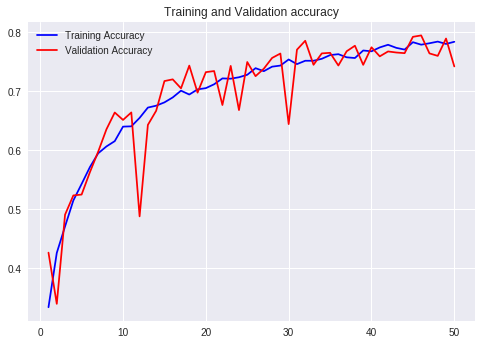

0.7421
Fold 3
Epoch 1/50
100/100 [==============================] - 11s 112ms/step - loss: 2.1889 - acc: 0.3380 - val_loss: 1.6183 - val_acc: 0.4503
Epoch 2/50
100/100 [==============================] - 9s 90ms/step - loss: 1.7322 - acc: 0.4266 - val_loss: 1.7317 - val_acc: 0.4516
Epoch 3/50
100/100 [==============================] - 9s 91ms/step - loss: 1.5745 - acc: 0.4772 - val_loss: 1.5144 - val_acc: 0.5110
Epoch 4/50
100/100 [==============================] - 9s 91ms/step - loss: 1.4115 - acc: 0.5169 - val_loss: 1.8351 - val_acc: 0.4356
Epoch 5/50
100/100 [==============================] - 9s 92ms/step - loss: 1.3001 - acc: 0.5558 - val_loss: 1.5772 - val_acc: 0.4938
Epoch 6/50
100/100 [==============================] - 9s 90ms/step - loss: 1.2264 - acc: 0.5722 - val_loss: 1.3010 - val_acc: 0.5716
Epoch 7/50
100/100 [==============================] - 9s 90ms/step - loss: 1.1837 - acc: 0.5898 - val_loss: 1.1579 - val_acc: 0.6031
Epoch 8/50
100/100 [==============================] -

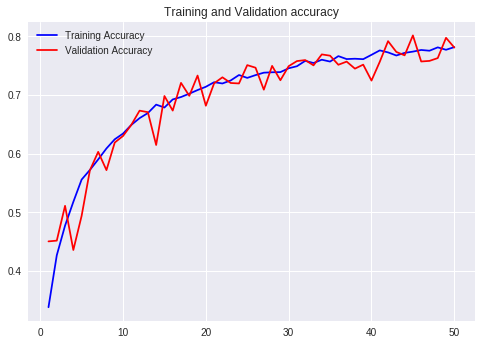

0.7811
Fold 4
Epoch 1/50
100/100 [==============================] - 11s 111ms/step - loss: 2.1398 - acc: 0.3465 - val_loss: 1.8681 - val_acc: 0.4214
Epoch 2/50
100/100 [==============================] - 9s 90ms/step - loss: 1.7199 - acc: 0.4328 - val_loss: 1.6264 - val_acc: 0.4908
Epoch 3/50
100/100 [==============================] - 9s 92ms/step - loss: 1.5199 - acc: 0.4870 - val_loss: 1.4592 - val_acc: 0.5388
Epoch 4/50
100/100 [==============================] - 9s 90ms/step - loss: 1.3734 - acc: 0.5320 - val_loss: 1.5483 - val_acc: 0.5001
Epoch 5/50
100/100 [==============================] - 9s 88ms/step - loss: 1.2866 - acc: 0.5527 - val_loss: 1.1052 - val_acc: 0.6253
Epoch 6/50
100/100 [==============================] - 9s 90ms/step - loss: 1.2072 - acc: 0.5796 - val_loss: 1.4233 - val_acc: 0.5715
Epoch 7/50
100/100 [==============================] - 9s 90ms/step - loss: 1.1621 - acc: 0.6001 - val_loss: 0.9910 - val_acc: 0.6511
Epoch 8/50
100/100 [==============================] -

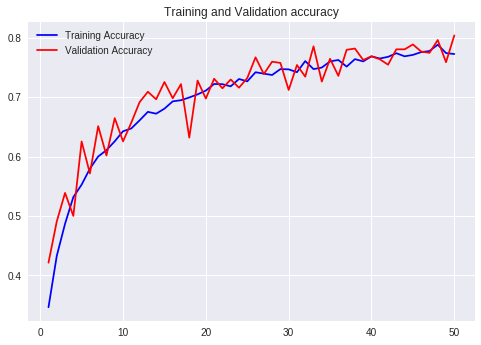

0.8038
Fold 5
Epoch 1/50
100/100 [==============================] - 12s 116ms/step - loss: 2.1386 - acc: 0.3502 - val_loss: 1.5685 - val_acc: 0.4930
Epoch 2/50
100/100 [==============================] - 9s 91ms/step - loss: 1.7335 - acc: 0.4290 - val_loss: 1.4767 - val_acc: 0.5169
Epoch 3/50
100/100 [==============================] - 9s 91ms/step - loss: 1.5367 - acc: 0.4755 - val_loss: 1.5733 - val_acc: 0.4950
Epoch 4/50
100/100 [==============================] - 9s 91ms/step - loss: 1.3909 - acc: 0.5184 - val_loss: 1.3257 - val_acc: 0.5455
Epoch 5/50
100/100 [==============================] - 9s 92ms/step - loss: 1.2674 - acc: 0.5596 - val_loss: 1.1487 - val_acc: 0.6098
Epoch 6/50
100/100 [==============================] - 9s 90ms/step - loss: 1.2120 - acc: 0.5768 - val_loss: 1.2184 - val_acc: 0.5881
Epoch 7/50
100/100 [==============================] - 9s 89ms/step - loss: 1.1514 - acc: 0.5980 - val_loss: 1.2097 - val_acc: 0.6048
Epoch 8/50
100/100 [==============================] -

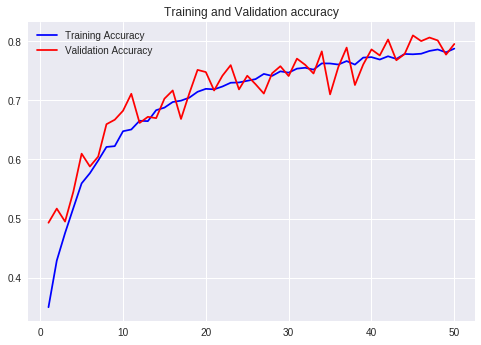

0.7953


In [8]:
k = 5
m = train_images_shuffled.shape[0]
fold_length = int(m/k)
start_index = 0
end_index = start_index + fold_length
val_accuracy = list()
for i in range(k):
  print("Fold",i+1)
  train_images_list = list(train_images_shuffled)
  train_labels_list = list(train_labels_shuffled)
  
  train_images = np.array(train_images_list[:start_index]+train_images_list[end_index:])
  train_labels = np.array(train_labels_list[:start_index]+train_labels_list[end_index:])
  val_images = np.array(train_images_list[start_index:end_index])
  val_labels = np.array(train_labels_list[start_index:end_index])
  #print(train_images.shape,train_labels.shape,val_images.shape, val_labels.shape)
  #print(start_index,end_index)
  start_index = start_index + fold_length
  end_index = end_index + fold_length
  acc = model_run(train_images,train_labels, val_images, val_labels,50)
  print(acc)
  val_accuracy.append(acc)

In [9]:
avg = np.mean(val_accuracy)
print("Average validation accuracy for k-fold validation is",avg)


Average validation accuracy for k-fold validation is 0.77918


#### Different folds in different cells

##### Fold 1

Epoch 1/200
100/100 [==============================] - 12s 117ms/step - loss: 2.1397 - acc: 0.3475 - val_loss: 2.2735 - val_acc: 0.3758
Epoch 2/200
100/100 [==============================] - 9s 89ms/step - loss: 1.7261 - acc: 0.4277 - val_loss: 1.5521 - val_acc: 0.4968
Epoch 3/200
100/100 [==============================] - 9s 92ms/step - loss: 1.5169 - acc: 0.4923 - val_loss: 1.3161 - val_acc: 0.5376
Epoch 4/200
100/100 [==============================] - 9s 88ms/step - loss: 1.3829 - acc: 0.5186 - val_loss: 1.2732 - val_acc: 0.5562
Epoch 5/200
100/100 [==============================] - 9s 89ms/step - loss: 1.3269 - acc: 0.5461 - val_loss: 1.6012 - val_acc: 0.5247
Epoch 6/200
100/100 [==============================] - 9s 89ms/step - loss: 1.2237 - acc: 0.5780 - val_loss: 1.1160 - val_acc: 0.6097
Epoch 7/200
100/100 [==============================] - 9s 90ms/step - loss: 1.1593 - acc: 0.5974 - val_loss: 1.0508 - val_acc: 0.6325
Epoch 8/200
100/100 [==============================] - 9s 90

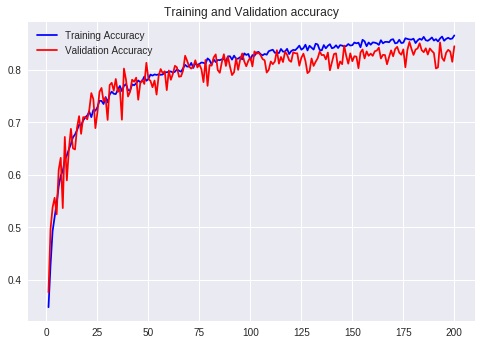

In [10]:
v_accuracy = list()
train_images_list = list(train_images_shuffled)
train_labels_list = list(train_labels_shuffled)

train_images = np.array(train_images_list[10000:])
train_labels = np.array(train_labels_list[10000:])
val_images = np.array(train_images_list[:10000])
val_labels = np.array(train_labels_list[:10000])
  
accuracy = model_run(train_images,train_labels, val_images, val_labels,200)
v_accuracy.append(accuracy)

##### Fold 2

Epoch 1/200
100/100 [==============================] - 12s 118ms/step - loss: 2.1446 - acc: 0.3438 - val_loss: 1.7402 - val_acc: 0.4377
Epoch 2/200
100/100 [==============================] - 9s 88ms/step - loss: 1.7448 - acc: 0.4213 - val_loss: 1.7759 - val_acc: 0.4466
Epoch 3/200
100/100 [==============================] - 9s 91ms/step - loss: 1.5606 - acc: 0.4670 - val_loss: 1.5898 - val_acc: 0.4720
Epoch 4/200
100/100 [==============================] - 9s 87ms/step - loss: 1.4396 - acc: 0.5036 - val_loss: 1.4662 - val_acc: 0.5118
Epoch 5/200
100/100 [==============================] - 9s 89ms/step - loss: 1.3366 - acc: 0.5352 - val_loss: 1.6440 - val_acc: 0.4887
Epoch 6/200
100/100 [==============================] - 9s 89ms/step - loss: 1.2722 - acc: 0.5566 - val_loss: 2.1104 - val_acc: 0.3836
Epoch 7/200
100/100 [==============================] - 9s 89ms/step - loss: 1.2025 - acc: 0.5835 - val_loss: 0.9764 - val_acc: 0.6594
Epoch 8/200
100/100 [==============================] - 9s 90

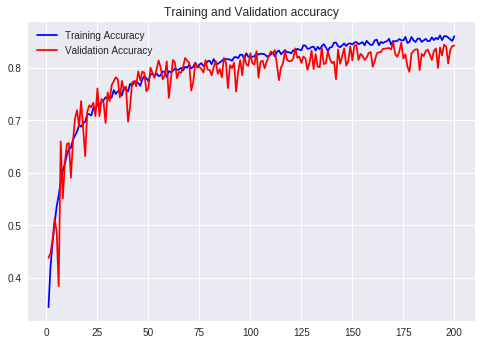

In [11]:
val_images = np.array(train_images_list[10000:20000])
val_labels = np.array(train_labels_list[10000:20000])
train_images = np.array(train_images_list[0:10000]+train_images_list[20000:])
train_labels = np.array(train_labels_list[0:10000]+train_labels_list[20000:])

accuracy = model_run(train_images,train_labels, val_images, val_labels,200)
v_accuracy.append(accuracy)


##### Fold 3

Epoch 1/200
100/100 [==============================] - 12s 121ms/step - loss: 2.1803 - acc: 0.3392 - val_loss: 1.8533 - val_acc: 0.4175
Epoch 2/200
100/100 [==============================] - 9s 91ms/step - loss: 1.7141 - acc: 0.4341 - val_loss: 1.9983 - val_acc: 0.3989
Epoch 3/200
100/100 [==============================] - 9s 91ms/step - loss: 1.5634 - acc: 0.4741 - val_loss: 1.5168 - val_acc: 0.4947
Epoch 4/200
100/100 [==============================] - 9s 90ms/step - loss: 1.4055 - acc: 0.5125 - val_loss: 1.2612 - val_acc: 0.5743
Epoch 5/200
100/100 [==============================] - 9s 92ms/step - loss: 1.3173 - acc: 0.5379 - val_loss: 1.1940 - val_acc: 0.5975
Epoch 6/200
100/100 [==============================] - 9s 90ms/step - loss: 1.2389 - acc: 0.5752 - val_loss: 1.2332 - val_acc: 0.5918
Epoch 7/200
100/100 [==============================] - 9s 91ms/step - loss: 1.1739 - acc: 0.5904 - val_loss: 1.1578 - val_acc: 0.5977
Epoch 8/200
100/100 [==============================] - 9s 90

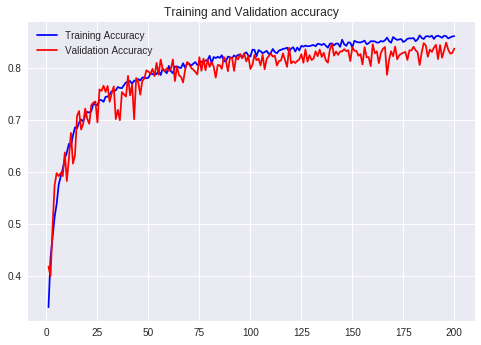

In [12]:
val_images = np.array(train_images_list[20000:30000])
val_labels = np.array(train_labels_list[20000:30000])
train_images = np.array(train_images_list[0:20000]+train_images_list[30000:])
train_labels = np.array(train_labels_list[0:20000]+train_labels_list[30000:])

accuracy = model_run(train_images,train_labels, val_images, val_labels,200)
v_accuracy.append(accuracy)

##### Fold 4

Epoch 1/200
100/100 [==============================] - 12s 124ms/step - loss: 2.1956 - acc: 0.3362 - val_loss: 1.5852 - val_acc: 0.4667
Epoch 2/200
100/100 [==============================] - 9s 90ms/step - loss: 1.7540 - acc: 0.4252 - val_loss: 2.7721 - val_acc: 0.3408
Epoch 3/200
100/100 [==============================] - 9s 90ms/step - loss: 1.5653 - acc: 0.4759 - val_loss: 1.6542 - val_acc: 0.4987
Epoch 4/200
100/100 [==============================] - 9s 89ms/step - loss: 1.4227 - acc: 0.5112 - val_loss: 1.2134 - val_acc: 0.5726
Epoch 5/200
100/100 [==============================] - 9s 88ms/step - loss: 1.2981 - acc: 0.5438 - val_loss: 1.0973 - val_acc: 0.6198
Epoch 6/200
100/100 [==============================] - 9s 92ms/step - loss: 1.2467 - acc: 0.5682 - val_loss: 1.2349 - val_acc: 0.5801
Epoch 7/200
100/100 [==============================] - 9s 89ms/step - loss: 1.1858 - acc: 0.5880 - val_loss: 1.1440 - val_acc: 0.5978
Epoch 8/200
100/100 [==============================] - 9s 90

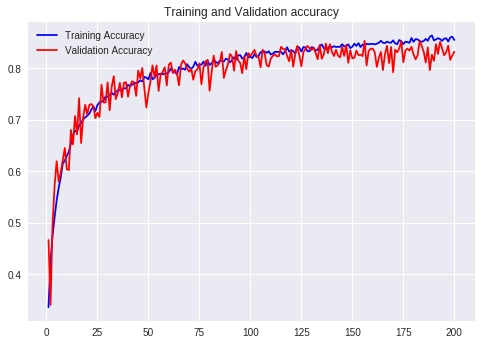

In [13]:
val_images = np.array(train_images_list[30000:40000])
val_labels = np.array(train_labels_list[30000:40000])
train_images = np.array(train_images_list[0:30000]+train_images_list[40000:])
train_labels = np.array(train_labels_list[0:30000]+train_labels_list[40000:])

accuracy = model_run(train_images,train_labels, val_images, val_labels,200)
v_accuracy.append(accuracy)

##### Fold 5

Epoch 1/200
100/100 [==============================] - 13s 131ms/step - loss: 2.1694 - acc: 0.3375 - val_loss: 1.9493 - val_acc: 0.3838
Epoch 2/200
100/100 [==============================] - 9s 91ms/step - loss: 1.7552 - acc: 0.4191 - val_loss: 1.6922 - val_acc: 0.4410
Epoch 3/200
100/100 [==============================] - 9s 90ms/step - loss: 1.5689 - acc: 0.4656 - val_loss: 1.2826 - val_acc: 0.5574
Epoch 4/200
100/100 [==============================] - 9s 89ms/step - loss: 1.4439 - acc: 0.4973 - val_loss: 1.5882 - val_acc: 0.4800
Epoch 5/200
100/100 [==============================] - 9s 89ms/step - loss: 1.3354 - acc: 0.5323 - val_loss: 1.9943 - val_acc: 0.3988
Epoch 6/200
100/100 [==============================] - 9s 90ms/step - loss: 1.2709 - acc: 0.5593 - val_loss: 1.0788 - val_acc: 0.6241
Epoch 7/200
100/100 [==============================] - 9s 91ms/step - loss: 1.2006 - acc: 0.5818 - val_loss: 1.0711 - val_acc: 0.6229
Epoch 8/200
100/100 [==============================] - 9s 89

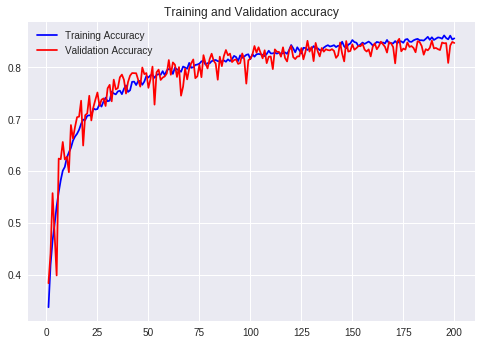

In [15]:
val_images = np.array(train_images_list[40000:50000])
val_labels = np.array(train_labels_list[40000:50000])
train_images = np.array(train_images_list[0:40000])
train_labels = np.array(train_labels_list[0:40000])

accuracy = model_run(train_images,train_labels, val_images, val_labels,200)
v_accuracy.append(accuracy)

In [18]:
average = np.mean(val_accuracy)
print("Average validation accuracy for k-fold validation is",average)

Average validation accuracy for k-fold validation is 0.84088


### Evaluating on test data

In [19]:
metrics_test = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', metrics_test[0])
print('Test accuracy:', metrics_test[1])

10000/10000 [==============================] - 2s 238us/step
Test loss: 0.4647290454387665
Test accuracy: 0.8473
